In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from sklearn_extra.cluster import KMedoids
from tslearn.metrics import dtw



In [53]:
def normalize_data(data):
    scaler = TimeSeriesScalerMeanVariance()
    data_normalized = scaler.fit_transform(data.values.reshape((data.shape[0], data.shape[1], 1)))
    return pd.DataFrame(data_normalized.reshape(data_normalized.shape[0], data_normalized.shape[1]), columns=data.columns)


In [54]:

def apply_kmedoids_dtw(data_normalized, n_clusters=3):
    data_normalized_values = data_normalized.values
    distance_matrix = np.array([[dtw(x, y) for y in data_normalized_values] for x in data_normalized_values])
    kmedoids_dtw = KMedoids(n_clusters=n_clusters, metric="precomputed", random_state=42)
    clusters = kmedoids_dtw.fit_predict(distance_matrix)
    data_normalized['cluster'] = clusters
    return kmedoids_dtw, data_normalized

In [55]:
def plot_clusters(data_normalized, kmedoids_dtw, y_label="Valeur", num_labels=10):
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))

    for cluster_id in range(kmedoids_dtw.n_clusters):
        cluster_data = data_normalized[data_normalized['cluster'] == cluster_id]


        for idx, row in cluster_data.iterrows():
            axes[cluster_id // 2, cluster_id % 2].plot(range(24), row[:-1], color='gray', alpha=0.5)

        medoid_idx = kmedoids_dtw.medoid_indices_[cluster_id]
        cluster_center = data_normalized.iloc[medoid_idx, :-1].values  
        axes[cluster_id // 2, cluster_id % 2].plot(range(24), cluster_center, color='red', linewidth=3, label=f"Medoid du Cluster {cluster_id}")

        axes[cluster_id // 2, cluster_id % 2].set_title(f"Séries temporelles du Cluster {cluster_id}")
        axes[cluster_id // 2, cluster_id % 2].set_xlabel("Heures")
        axes[cluster_id // 2, cluster_id % 2].set_ylabel(y_label)
        axes[cluster_id // 2, cluster_id % 2].set_yticks(np.linspace(data_normalized.iloc[:, :-1].min().min(), data_normalized.iloc[:, :-1].max().max(), num_labels))
        axes[cluster_id // 2, cluster_id % 2].grid(True)

    plt.tight_layout()
    plt.show()

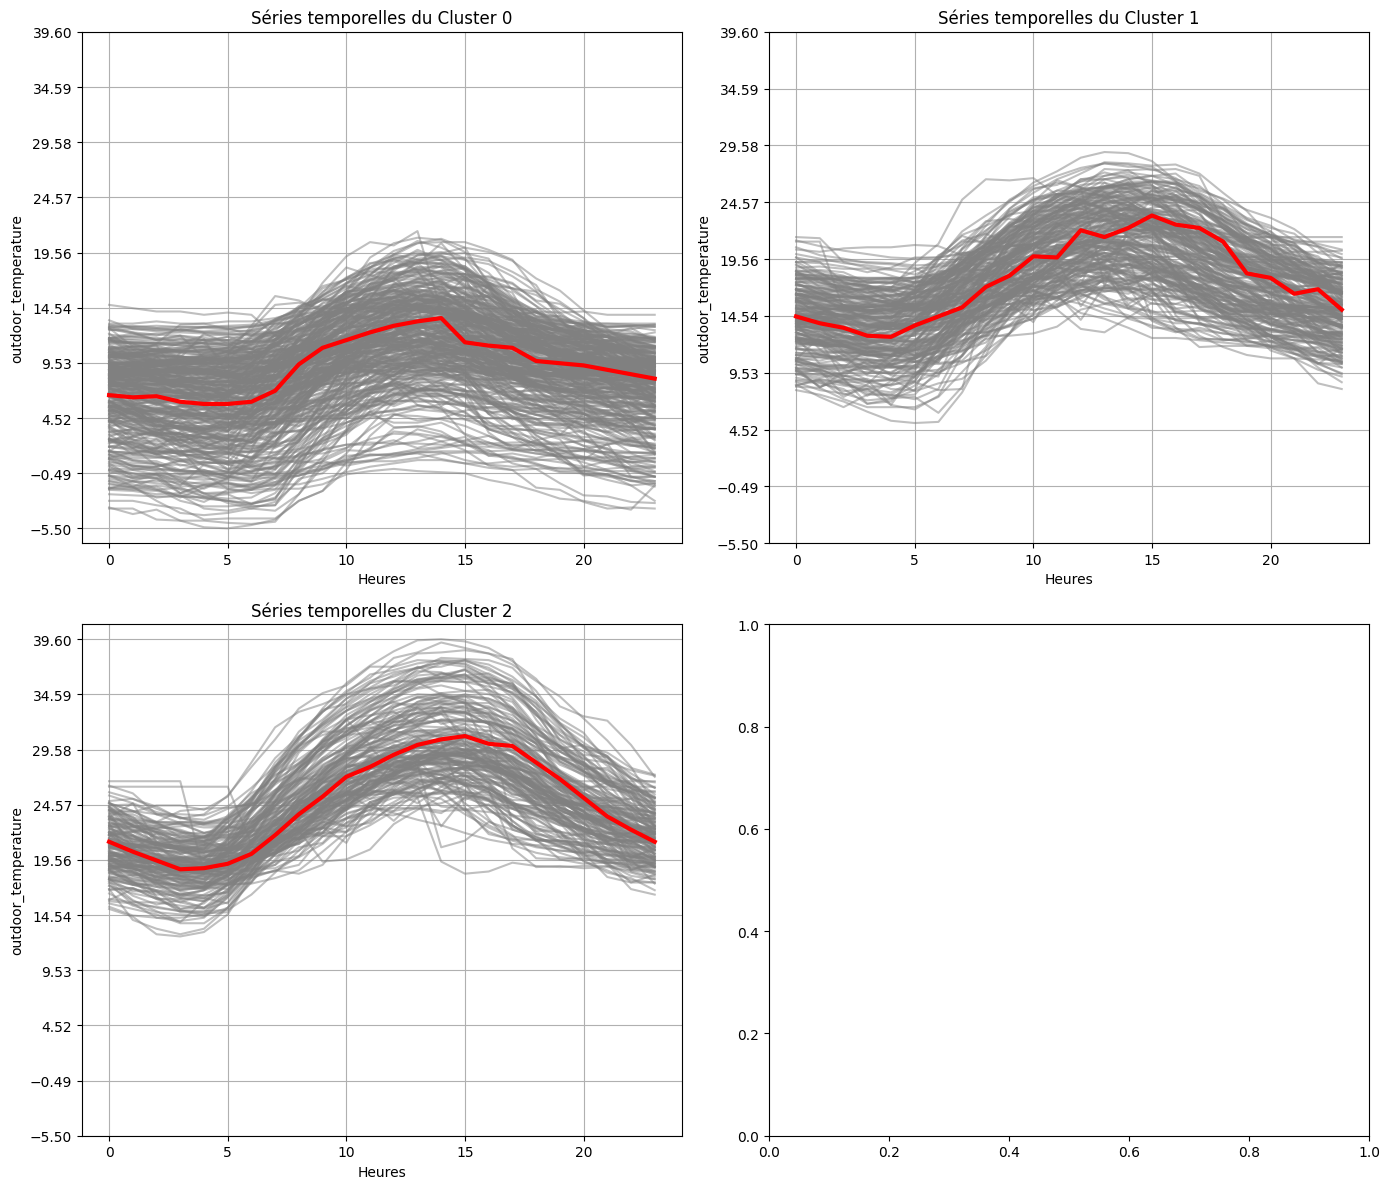

In [67]:
df_temp_out = pd.read_csv('outdoor_temperature.csv')  
df_temp_out.columns = [i for i in range(df_temp_out.shape[1])]
# data_normalized = normalize_data(df_temp_out)
kmedoids_dtw, data_normalized_with_cluster = apply_kmedoids_dtw(df_temp_out, 3)
plot_clusters(data_normalized_with_cluster, kmedoids_dtw,"outdoor_temperature")


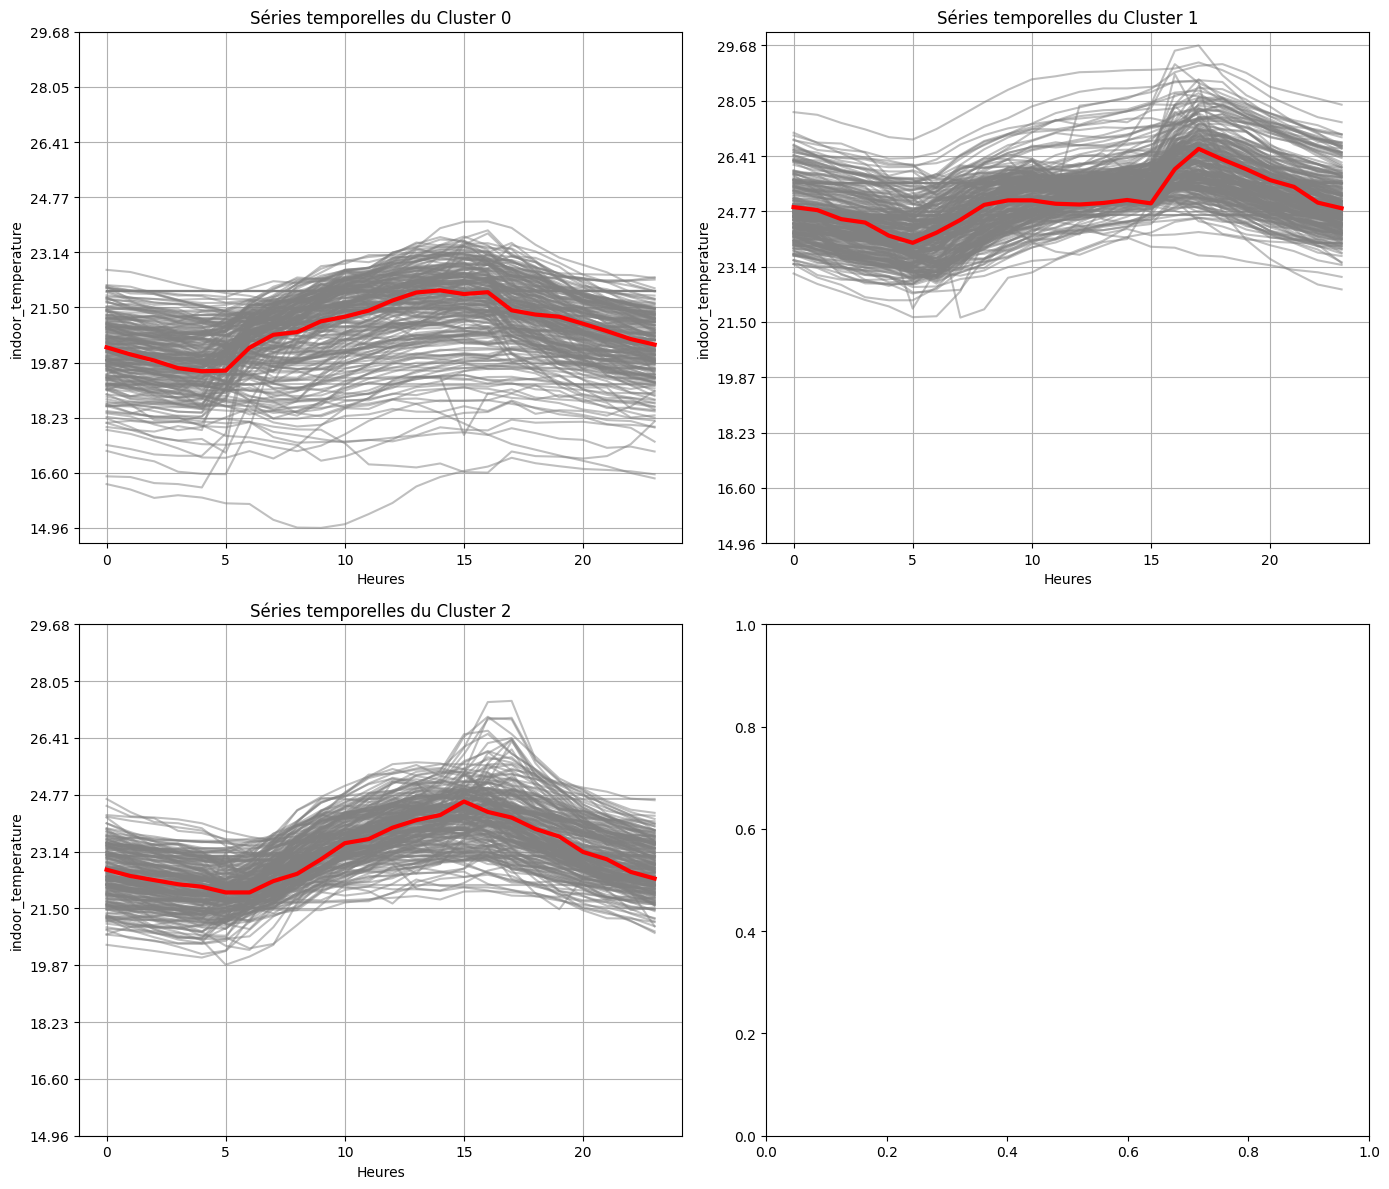

In [68]:
df_temp_in= pd.read_csv('indoor_temperature.csv')  
df_temp_in.columns = [i for i in range(df_temp_in.shape[1])]
# data_normalized = normalize_data(df_temp_out)
kmedoids_dtw, data_normalized_with_cluster = apply_kmedoids_dtw(df_temp_in, 3)
plot_clusters(data_normalized_with_cluster, kmedoids_dtw,"indoor_temperature")


C:\Users\joeto\anaconda3\envs\tp\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
C:\Users\joeto\anaconda3\envs\tp\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


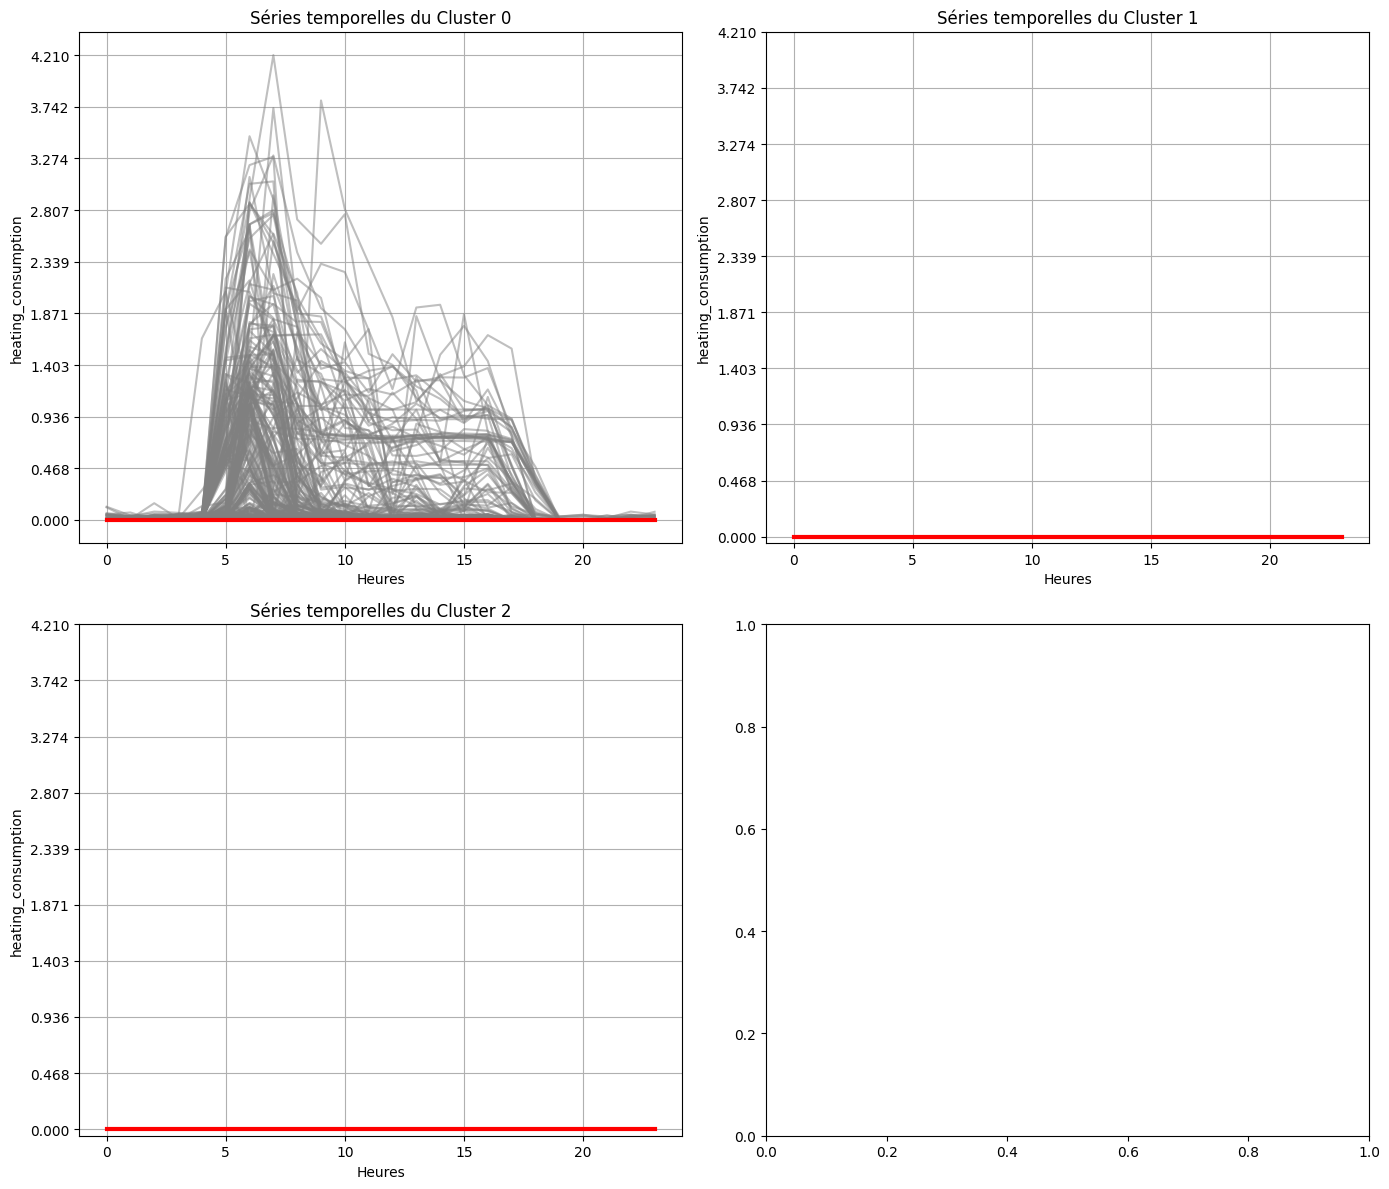

In [69]:
df_heat = pd.read_csv('heating_consumption.csv')  
df_heat.columns = [i for i in range(df_heat.shape[1])]
#data_normalized = normalize_data(df_heat)
kmedoids_dtw, data_normalized_with_cluster = apply_kmedoids_dtw(df_heat, 3)
plot_clusters(data_normalized_with_cluster, kmedoids_dtw,"heating_consumption")

C:\Users\joeto\anaconda3\envs\tp\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
C:\Users\joeto\anaconda3\envs\tp\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


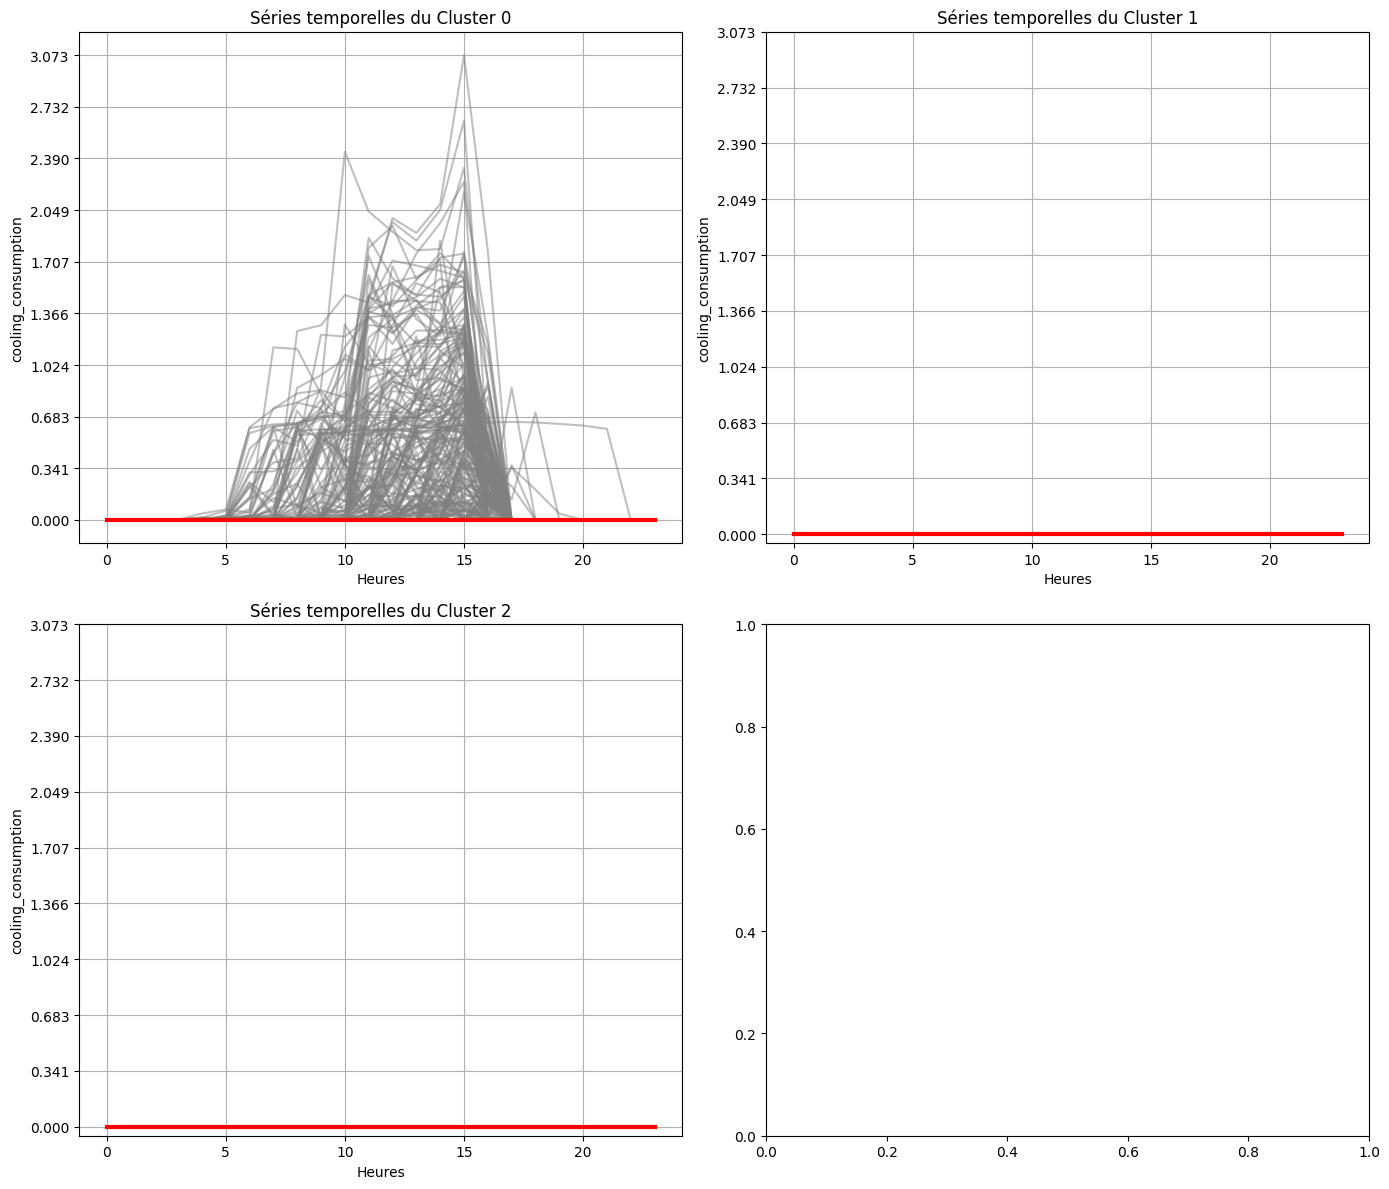

In [70]:
df_cool = pd.read_csv('cooling_consumption.csv')  
df_cool.columns = [i for i in range(df_cool.shape[1])]
# data_normalized = normalize_data(df_temp_out)
kmedoids_dtw, data_normalized_with_cluster = apply_kmedoids_dtw(df_cool, 3)
plot_clusters(data_normalized_with_cluster, kmedoids_dtw,"cooling_consumption")

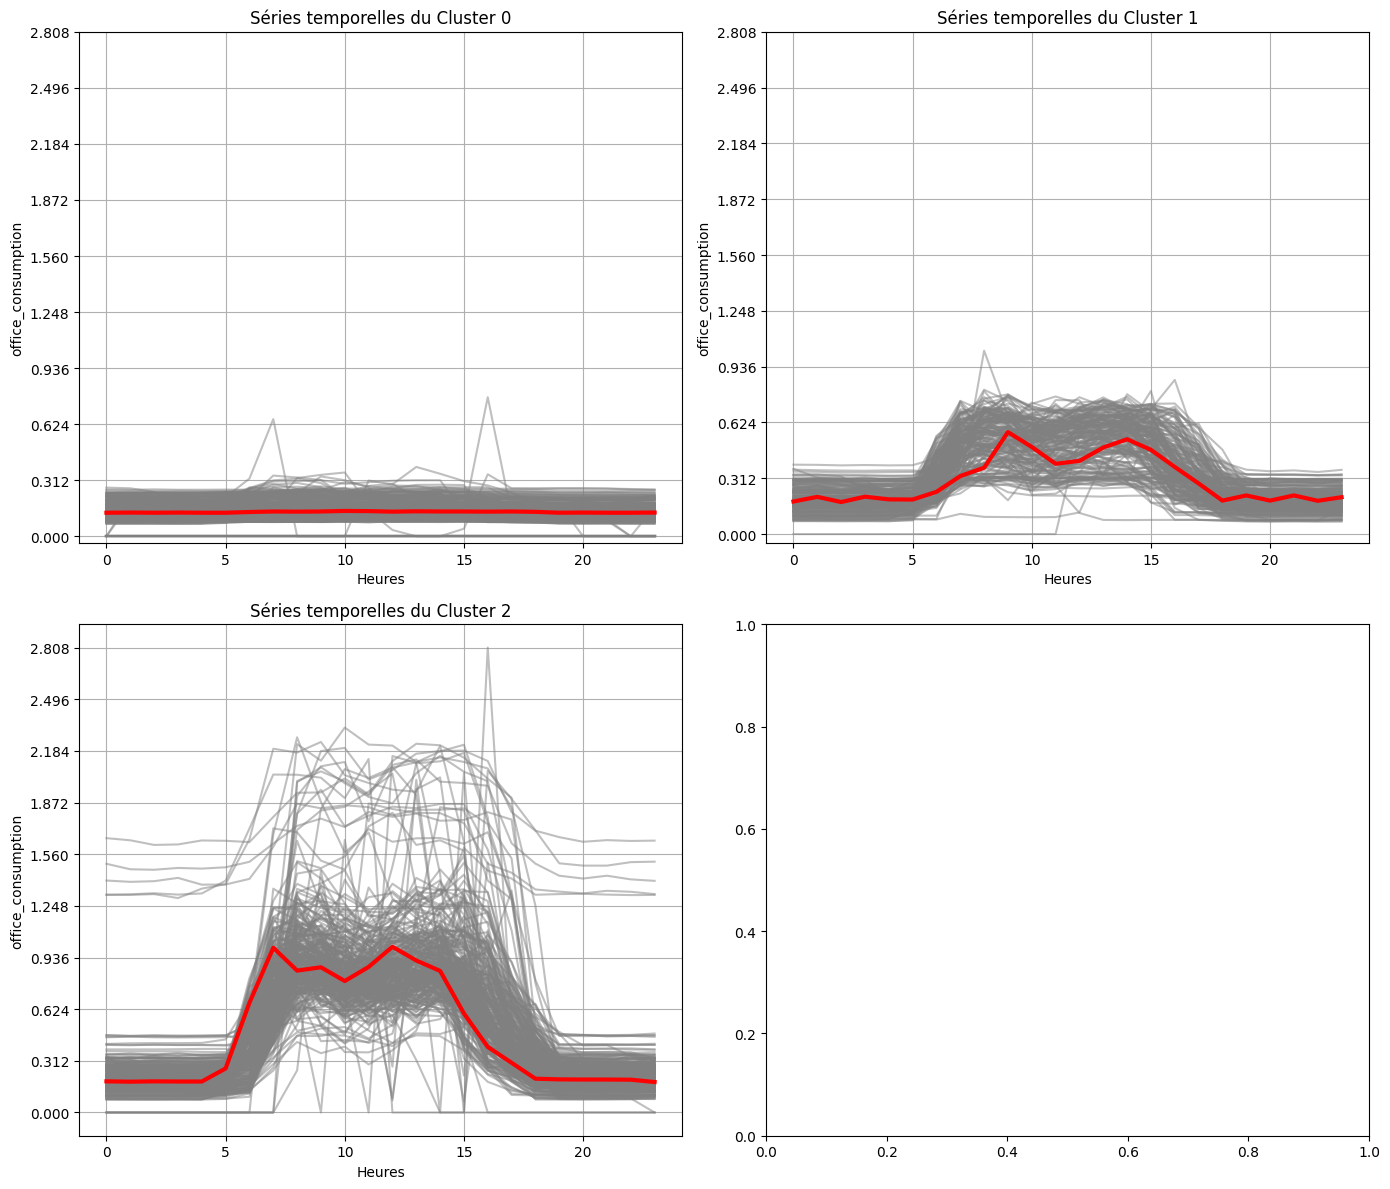

In [71]:
df_office = pd.read_csv('office_consumption.csv')  
df_office.columns = [i for i in range(df_office.shape[1])]
# data_normalized = normalize_data(df_temp_out)
kmedoids_dtw, data_normalized_with_cluster = apply_kmedoids_dtw(df_office, 3)
plot_clusters(data_normalized_with_cluster, kmedoids_dtw,"office_consumption")